In [1]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

The Poincaré-Bendixson theorem describes the behavior of two-dimensional ODE systems that under certain conditions a system will exhibit either a stable equilibrium point or contains a limit cycle (such as we see in an oscillator).

**Poincaré-Bendixson Theorem:**  The attractor for any smooth two-dimensional bounded continuous-time autonomous system is either a stable equilibrium or a limit cycle.

Now consider the following system
$$\begin{aligned}
    \frac{dx}{dt} &= \frac{xy}{x^2 + y^2} - \alpha x, \\
    \frac{dy}{dt} &= \frac{y^2}{x^2 + y^2} - \beta y + \beta -1 
\end{aligned}$$
with $\alpha, \beta \in \mathbb{R}$.  

**(a)** (5) What point may be problematic for us and violate the Poincaré-Bendixson theorem?

$(x,y)=(0,0)$, as $$\frac{xy}{x^2+y^2}$$ and $$\frac{y^2}{x^2+y^2}$$ are not defined.
The partial derivative of $\frac{y^2}{x^2+y^2}$ with respect to $y$ is:
$$ \frac{2yx^2}{(x^2+y^2)^2}$$
This blows up at $(x,y)=(0,0)$.

**(b)**  (5) Formulate the system 
$\frac{d}{dt}\mathbf{u} = f(t, \mathbf{u})$ where $\mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} $

$$\frac{d}{dt}\overrightarrow{u}=\begin{pmatrix}
\frac{u_1u_2}{u_1^2+u_2^2}-\alpha u_1\\ 
\frac{u_2^2}{u_1^2+u_2^2}-\beta u_2 + \beta -1\\ 
\end{pmatrix}$$

**(c)** (15) Solve the above system numerically using a predictor-corrector method with the 3-step Adams-Bashforth as the predictor and the 3-step Adams-Moulton method as the corrector.  Use RK2 to boot-strap (start) the method.  Use the initial condition
$$
    (x_0, y_0) = (1, 0)
$$
and
$$
    \alpha = 0 ~~~ \text{and} ~~~ \beta = 0.7.
$$
Plot the phase-plane solution ($x$ vs. $y$) for $t_f$ at least out to $t = 100$.  Comment on what you see making sure to connect it to the Poincaré-Bendixson theorem.  You also may want to play with the initial condition and shorter time spans to examine the behavior around a particular point.

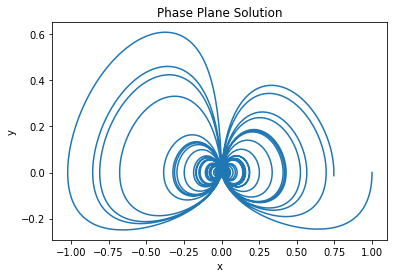

In [121]:
alpha = 0
beta = 0.7
f = lambda u: numpy.array([u[0]*u[1] / (u[0]**2+u[1]**2) - alpha*u[0], u[1]**2 / (u[0]**2+u[1]**2) - beta*u[1] + beta - 1])

N = 2000
tf = 100
t = numpy.linspace(0, tf, N)
delta_t = t[1] - t[0]
U = numpy.zeros([N, 2])
U[0] = numpy.array([1, 0])

U[1] = U[0] + delta_t * f(U[0] + delta_t / 2 * f(U[0]))
U[2] = U[1] + delta_t * f(U[1] + delta_t / 2 * f(U[1]))

for n in range(N-3):
    U_n3 = U[n+2] + delta_t / 12 * (5 * f(U[n]) - 16 * f(U[n+1]) + 23 * f(U[n+2]))
    U[n+3] = U[n+2] + delta_t / 24 * (f(U[n]) - 5*f(U[n+1]) + 19 * f(U[n+2]) + 9 * f(U_n3))

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(U[:,0], U[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Plane Solution')

plt.show()

With the initial conditons stated, we have neither a limit cycle, nor a convergence to a stable equilibrium point. This is because the point $(x,y)=(0,0)$ violates the Theorem, as described before.

Note that $(x,y)=(0,1)$ is a stationary point of the system. The system will tend towards this point for any initial conditions of the form $(x_0,y_0)=(0,y)$. This is because the system becomes:

$$\begin{aligned}
    \frac{dx}{dt} &= 0, \\
    \frac{dy}{dt} &= \beta (1 - y) 
\end{aligned}$$

Let $x\neq 0$. As $\alpha=0$, we have that for a stationary point we need $x'=0$, so $y=0$. But this would mean that $y'=\beta-1$ requiring that $\beta=1$. Thus, $(x,y)=(0,1)$ is the only stationary point.